In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
# Scientific Computing
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from tools.tools import *
from tools.io import *
from tools.methods import *

sns.set(style='ticks', context='paper')
mpl.rc('figure', dpi=100, figsize=[8, 3.5])
mpl.rc('savefig', dpi=500, bbox='tight')
mpl.rc('legend', frameon=False)

sns.set(style='ticks', context='paper', font_scale=1.3)

In [35]:
data_path = '../../data/'

In [36]:
#%%
lengthfile = data_path+'psom/sensitivity_length.feather'
numberfile = data_path+'psom/sensitivity_number.feather'
aspectfile = data_path+'psom/sensitivity_aspect.feather'

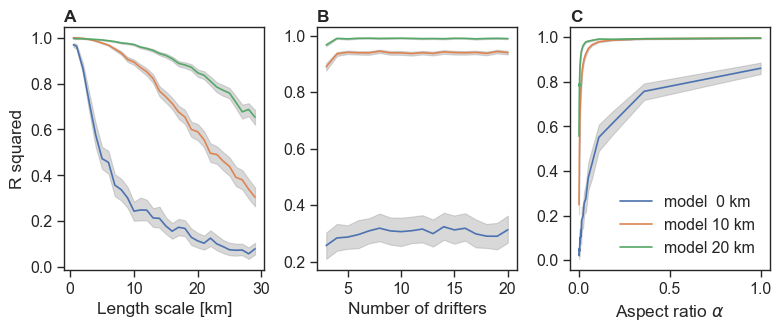

In [38]:
f,ax = plt.subplots(1,3,sharey=False)

# dat = read_feather(snakemake.input[0])
dat = read_feather(lengthfile)
for filt in dat['filter'].unique():
    temp = dat[dat['filter']==filt]
    ax[0].fill_between(temp.index, temp.ci_low, temp.ci_high, color='grey', alpha=.3)
    ax[0].plot(temp.index, temp.error, label=f'model {filt:02d}km')
# ax[0].legend()
ax[0].set_xlabel('Length scale [km]')
ax[0].set_ylabel(r'R squared')

# dat = read_feather(snakemake.input[1])
dat = read_feather(numberfile)
for filt in dat['filter'].unique():
    temp = dat[dat['filter']==filt]
    ax[1].fill_between(temp.index, temp.ci_low, temp.ci_high, color='grey', alpha=.3)
    ax[1].plot(temp.index, temp.error, label=f'model {filt:02d}km')
# ax[1].legend()
ax[1].set_xlabel('Number of drifters')

# dat = read_feather(snakemake.input[2])
dat = read_feather(aspectfile)
for filt in dat['filter'].unique():
    temp = dat[dat['filter']==filt]
    ax[2].fill_between(temp.index, temp.ci_low, temp.ci_high, color='grey', alpha=.3)
    ax[2].plot(temp.index, temp.error, label=f'model {filt:2d} km')
ax[2].legend()
ax[2].set_xlabel(r'Aspect ratio $\alpha$')

for j,axx in enumerate(ax):
    axx.annotate(chr(65+j),(0,1.02),xycoords='axes fraction',weight='bold')

# plt.savefig('figures/sensitivity.pdf')
plt.tight_layout()
plt.show()